Primer ejemplo algoritmo Clasificador Gradient Boosting, con su matriz de confusión.
Gráficos paso por paso agregados.

🧾 Condiciones y predicciones:
Nublado, Calmo ➡ ❌ No practicar
Nublado, Ventoso ➡ ❌ No practicar
Soleado, Calmo ➡ ❌ No practicar
Soleado, Ventoso ➡ 🏄 Windsurf!


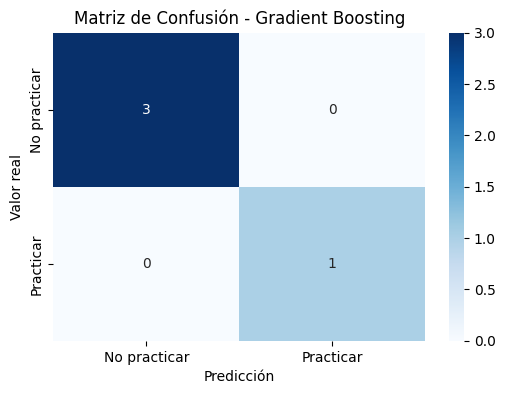

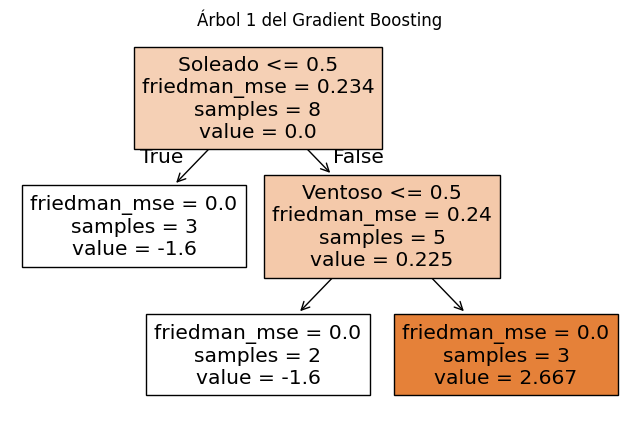

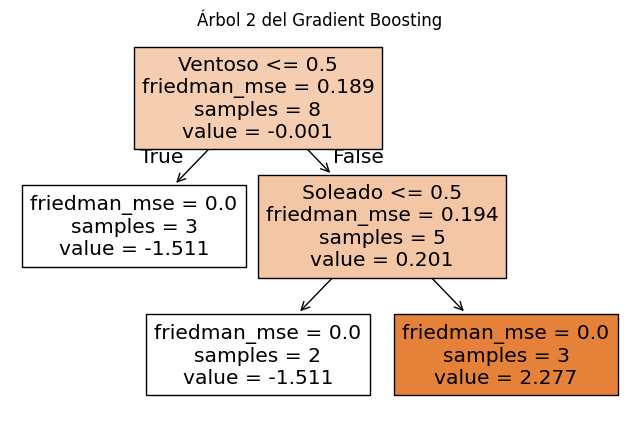

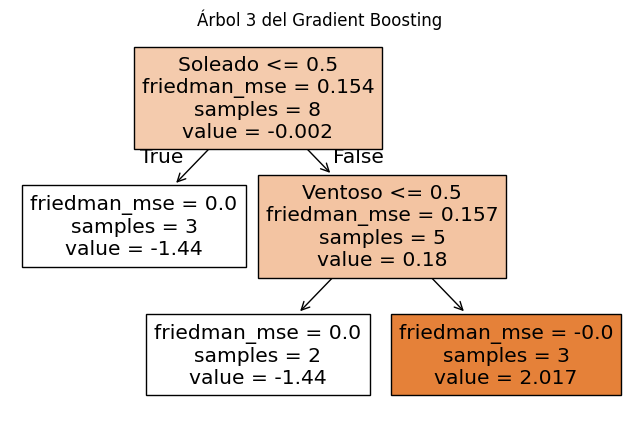

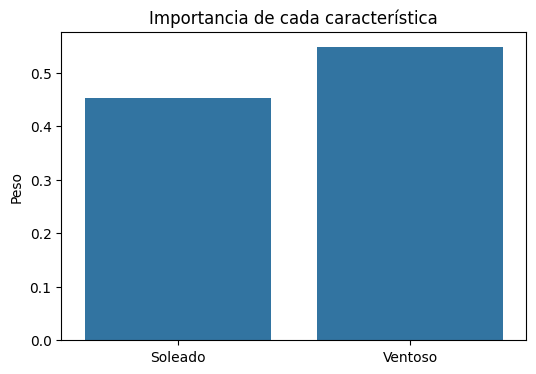

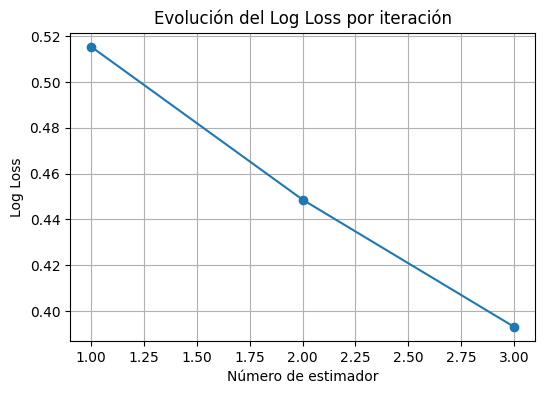

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn import tree

# Datos de entrenamiento
X = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 0, 0, 0, 1, 0, 0, 1])

# Entrenamos el modelo Gradient Boosting
clf = GradientBoostingClassifier(n_estimators=3, max_depth=2, random_state=42)
clf.fit(X, y)

# Casos a predecir
X_test = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_test = np.array([0, 0, 0, 1])  # Valores reales
y_pred = clf.predict(X_test)

# Mostrar predicciones
print("🧾 Condiciones y predicciones:")
for cond, res in zip(X_test, y_pred):
    sol = "Soleado" if cond[0] else "Nublado"
    ven = "Ventoso" if cond[1] else "Calmo"
    act = "🏄 Windsurf!" if res else "❌ No practicar"
    print(f"{sol}, {ven} ➡ {act}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No practicar', 'Practicar'], 
            yticklabels=['No practicar', 'Practicar'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()

# Visualizar árboles individuales
for i in range(clf.n_estimators):
    plt.figure(figsize=(8, 5))
    tree.plot_tree(clf.estimators_[i, 0], filled=True, 
                   feature_names=['Soleado', 'Ventoso'], 
                   class_names=['No', 'Sí'])
    plt.title(f"Árbol {i + 1} del Gradient Boosting")
    plt.show()

# Importancia de características
feature_names = ['Soleado', 'Ventoso']
importancias = clf.feature_importances_

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_names, y=importancias)
plt.title("Importancia de cada característica")
plt.ylabel("Peso")
plt.show()

# Evolución del error (Log Loss)
losses = []
for y_pred_proba in clf.staged_predict_proba(X_test):
    loss = log_loss(y_test, y_pred_proba)
    losses.append(loss)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title("Evolución del Log Loss por iteración")
plt.xlabel("Número de estimador")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()


El log loss es una función logarítmica que mide qué tan bien un modelo de clasificación predice probabilidades.
Aqui no solo importa si acierta o se equivoca, sino qué tan seguro estaba al predecir.